<a href="https://colab.research.google.com/github/ManishKr19/Edureka-Data-Science/blob/main/Certification_Project_Statement_PHARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Certification Project Statement - PHARMA**

***Certification Project***

***By: Manish Kumar***

***Mail: k.manish29@tcs.com***

#### **Problem Statement** 

*Maple Leaves Ltd is a start-up company which makes herbs from different types of plants and its leaves. Currently the system they use to classify the trees which they import in a batch is quite manual. A labourer from his experience decides the leaf type and subtype of plant family. They have asked us to automate this process and remove any manual intervention from this process.*



#### **Objective:**
 _To classify the plant leaves by various classifiers from different metrics of the leaves and to choose the best classifier for future reference._



 **Implementation:**
1.   Import the train and test csv. 

2.   Import the required classification libraries along with pandas, numpy, seaborn etc

3.   Then import the classifiers from them (Randomforest, SVM, NaiveBayes, DecisionTrees)

4.   After this create a function to encode the labels of the strings given in the dataset

5.   You can do the above step using label encoder. With this you are creating some labels from train set as test set. The test set we imported is for testing the best classifier accuracy once we choose it

6.   Then extract the values from train set by stratifying them and dividing it into 80:20 ratio

7.   Now your X train, X test, Y train, Y test are ready.
8.   We currently don’t know which is the best classifier on the dataset. So,we apply all 4 of them.

9.   Create the classifiers class and initialize all the respective classifiers
10.  Then run the X train & X test datasets through classifiers calculating the log loss and accuracy of the result

11.  Choose the classifier which has the best accuracy

12.  Then try to predict the result on the import test.csv dataset

#### **Importing Python Libraries**

In [33]:
# Python Standard Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# train_test_split Librarry for data spliting
from sklearn.model_selection import train_test_split

#classification libraries
from sklearn.datasets import make_classification

#pipeline libraries
from sklearn.pipeline import make_pipeline

#preprocessing libraries
from sklearn.preprocessing import StandardScaler

# LIbraries dedicated for Machine Learning

## 1.0 Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

## 2.0 Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

## 3.0 Naive Bayes Libraries
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB

## 4.0 SVC Libraries
from sklearn.svm import SVC


#### **Loading Dataset(train/test)**

In [35]:

train_data = pd.read_csv(r"/content/train.csv")
test_data = pd.read_csv(r"/content/test.csv")

print("Train_Data Size: ", train_data.shape)
print("Test_Data Size: ", test_data.shape)

Train_Data Size:  (990, 194)
Test_Data Size:  (594, 193)


In [36]:
train_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.0,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.0,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.0,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.0,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.0,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,...,0.005859,0.019531,0.124020,0.000000,0.017578,0.000977,0.016602,0.009766,0.006836,0.000977,0.005859,0.0,0.000977,0.001953,0.096680,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.0,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.0,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.0,0.000000,0.015625,0.009766,0.001953,0.017578,0.041016,0.005859,0.021484,0.013672,0.017578,0.000000,0.005859,0.009766,0.027344,0.083984,...,0.000000,0.000000,0.040039,0.005859,0.005859,0.000000,0.003906,0.000000,0.000000,0.110350,0.000000,0.0,0.000000,0.087891,0.023

In [37]:
test_data.head()


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,...,0.004883,0.000000,0.013672,0.001953,0.045898,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,...,0.001953,0.002930,0.051758,0.001953,0.016602,0.010742,0.044922,0.000000,0.000000,0.033203,0.013672,0.000000,0.000000,0.031250,0.058594,0.041016,0.012695,0.005859,0.021484,0.047852,0.030273,0.009766,0.041992,0.000000,0.007812,0.004883,0.000000,0.000000,0.000000,0.049805,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,0.005859,0.001953,0.021484,0.001953,0.019531,0.035156,0.000000,0.007812,0.001953,0.046875,0.003906,0.003906,0.013672,0.015625,0.037109,0.027344,0.009766,0.023438,0.027344,0.005859,0.011719,0.046875,0.056641,0.001953,0.003906,0.003906,0.005859,0.001953,0.003906,0.013672,...,0.000000,0.010742,0.010742,0.000000,0.005859,0.000000,0.088867,0.000000,0.000977,0.051758,0.000000,0.000000,0.000000,0.042969,0.002930,0.026367,0.000000,0.000000,0.000000,0.013672,0.003906,0.022461,0.007812,0.038086,0.000000,0.000000,0.000000,0.000000,0.000000,0.084961,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,0.001953,0.000000,0.029297,0.000000,0.039062,0.037109,0.003906,0.007812,0.005859,0.007812,0.005859,0.025391,0.023438,0.015625,0.021484,0.033203,0.009766,0.050781,0.015625,0.005859,0.005859,0.009766,0.015625,0.001953,0.003906,0.001953,0.005859,0.001953,0.039062,0.027344,...,0.000977,0.063477,0.013672,0.000000,0.003906,0.005859,0.000977,0.022461,0.006836,0.026367,0.000000,0.040039,0.009766,0.026367,0.016602,0.017578,0.000000,0.005859,0.018555,0.011719,0.000977,0.010742,0.025391,0.000000,0.019531,0.004883,0.077148,0.036133,0.037109,0.040039,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,0.000000,0.001953,0.033203,0.000000,0.003906,0.011719,0.000000,0.003906,0.005859,0.011719,0.001953,0.035156,0.027344,0.000000,0.003906,0.056641,0.013672,0.029297,0.023438,0.000000,0.013672,0.074219,0.083984,0.009766,0.000000,0.000000,0.001953,0.007812,0.031250,0.009766,...,0.014648,0.017578,0.000977,0.002930,0.034180,0.010742,0.031250,0.052734,0.0009

#### **Preprocessing Data**

In [38]:
train_data = train_data.drop('id', axis=1)
test_data = test_data.drop('id', axis=1)

In [39]:
train_data.info

<bound method DataFrame.info of                    species   margin1   margin2  ...  texture62  texture63  texture64
0              Acer_Opalus  0.007812  0.023438  ...   0.004883   0.000000   0.025391
1    Pterocarya_Stenoptera  0.005859  0.000000  ...   0.000977   0.039062   0.022461
2     Quercus_Hartwissiana  0.005859  0.009766  ...   0.000000   0.020508   0.002930
3          Tilia_Tomentosa  0.000000  0.003906  ...   0.017578   0.000000   0.047852
4       Quercus_Variabilis  0.005859  0.003906  ...   0.000000   0.000000   0.031250
..                     ...       ...       ...  ...        ...        ...        ...
985   Magnolia_Salicifolia  0.060547  0.119140  ...   0.000000   0.000000   0.018555
986            Acer_Pictum  0.001953  0.003906  ...   0.000977   0.000000   0.021484
987     Alnus_Maximowiczii  0.001953  0.003906  ...   0.027344   0.000000   0.001953
988          Quercus_Rubra  0.000000  0.000000  ...   0.000000   0.001953   0.002930
989         Quercus_Afares  0.023

In [40]:
test_data.info

<bound method DataFrame.info of       margin1   margin2   margin3  ...  texture62  texture63  texture64
0    0.019531  0.009766  0.078125  ...   0.000000   0.003906   0.053711
1    0.007812  0.005859  0.064453  ...   0.000977   0.037109   0.044922
2    0.000000  0.000000  0.001953  ...   0.015625   0.000000   0.000000
3    0.000000  0.000000  0.009766  ...   0.089844   0.000000   0.008789
4    0.001953  0.000000  0.015625  ...   0.007812   0.009766   0.007812
..        ...       ...       ...  ...        ...        ...        ...
589  0.000000  0.000000  0.003906  ...   0.018555   0.000000   0.000977
590  0.000000  0.003906  0.003906  ...   0.090820   0.000000   0.016602
591  0.017578  0.029297  0.015625  ...   0.000000   0.042969   0.006836
592  0.013672  0.009766  0.060547  ...   0.000000   0.011719   0.018555
593  0.000000  0.117190  0.000000  ...   0.015625   0.000000   0.017578

[594 rows x 192 columns]>

In [41]:
# NULL/NAN Value checking
print(train_data.isna().sum(), test_data.isna().sum(), sep="\n")

species      0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64
margin1      0
margin2      0
margin3      0
margin4      0
margin5      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 192, dtype: int64


In [42]:
# Zero Value checking
train_data.eq(0).sum()

species        0
margin1      203
margin2      207
margin3       23
margin4       62
            ... 
texture60    763
texture61    886
texture62    348
texture63    411
texture64    204
Length: 193, dtype: int64

In [43]:
# Zero Value checking
test_data.eq(0).sum()

margin1      123
margin2      132
margin3       12
margin4       52
margin5      113
            ... 
texture60    446
texture61    531
texture62    211
texture63    245
texture64    122
Length: 192, dtype: int64

***Remove all the colmns having more than 50% values are zero***

In [44]:
def drop_Zero_column(df):
  length = df.shape[0]
  for column in df.columns:
    if df[column].eq(0).sum() > (0.50*length):
      df.drop(column, axis=1, inplace=True)
  print("New Data Size is: ", df.shape)

drop_Zero_column(train_data)
drop_Zero_column(test_data)


New Data Size is:  (990, 171)
New Data Size is:  (594, 170)


***Descriptive Analysis***

In [45]:
train_data.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin17,margin18,margin19,margin20,margin21,margin22,margin24,margin25,margin26,margin28,margin29,margin30,margin31,margin32,margin33,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,...,texture11,texture13,texture14,texture17,texture18,texture19,texture20,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture34,texture35,texture38,texture39,texture40,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture53,texture54,texture55,texture57,texture58,texture59,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.007167,0.018639,0.024209,0.011975,0.041252,0.008053,0.015609,0.015128,0.020107,0.012344,0.013135,0.019131,0.006195,0.007647,0.008854,0.018718,0.015534,0.028261,0.016501,0.010843,0.009691,0.019502,0.013167,0.018042,0.016268,0.031061,0.014846,0.008164,0.010884,0.017495,0.018858,0.012679,0.024688,...,0.018796,0.009814,0.012796,0.015098,0.006175,0.024458,0.014515,0.013171,0.017050,0.010163,0.010437,0.023274,0.020317,0.010097,0.021722,0.011675,0.023895,0.026518,0.010514,0.023964,0.017060,0.019187,0.005895,0.013875,0.025263,0.016227,0.021760,0.018595,0.016763,0.011680,0.018986,0.014469,0.022091,0.036501,0.015944,0.011586,0.016108,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.008933,0.016071,0.026086,0.011732,0.046341,0.013273,0.014277,0.010821,0.021285,0.014479,0.009672,0.019463,0.010203,0.012864,0.012724,0.012313,0.014100,0.022852,0.016560,0.016563,0.019291,0.016000,0.013218,0.016464,0.011484,0.023270,0.013242,0.010194,0.023445,0.014471,0.020935,0.011686,0.024317,...,0.033411,0.014276,0.018221,0.026452,0.013688,0.032387,0.016405,0.021621,0.023974,0.017873,0.016252,0.041760,0.031532,0.018188,0.026749,0.012933,0.027225,0.042266,0.011852,0.027909,0.021796,0.025500,0.010653,0.018022,0.046437,0.021087,0.026324,0.016007,0.029841,0.013163,0.027361,0.021654,0.027335,0.063403,0.023214,0.025040,0.015335,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.001953,0.005859,0.003906,0.001953,0.007812,0.000000,0.001953,0.005859,0.005859,0.003906,0.005859,0.

#### **Outlier Analysis**

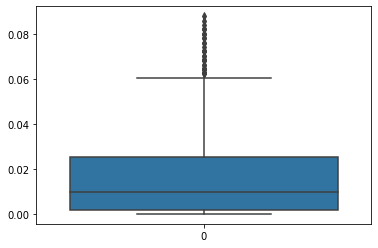

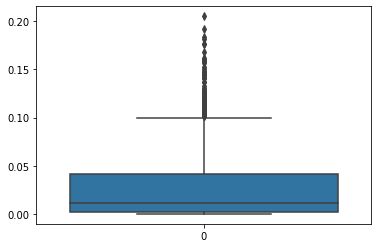

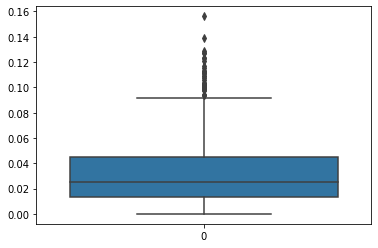

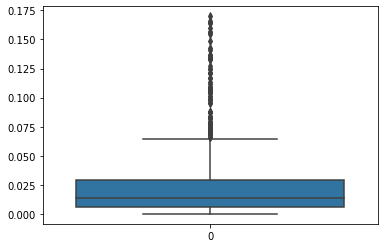

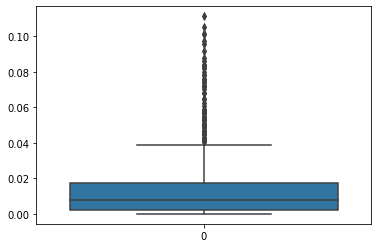

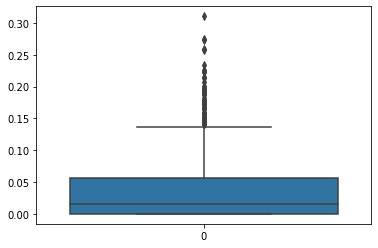

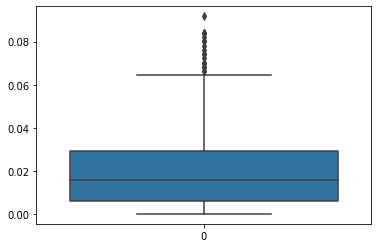

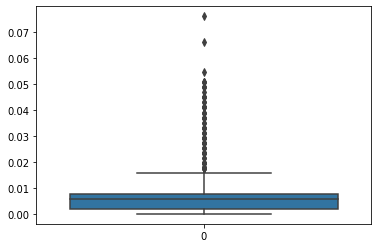

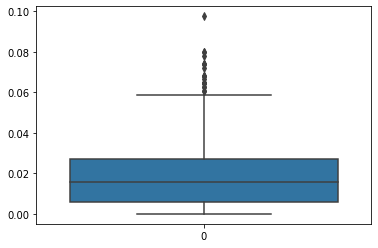

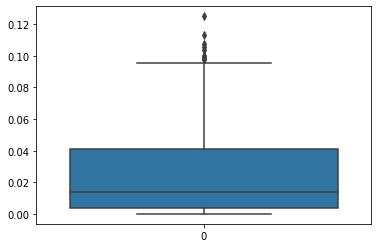

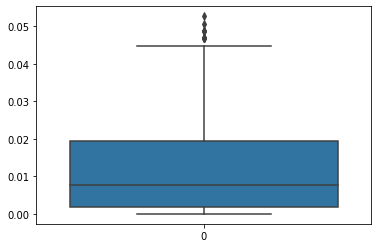

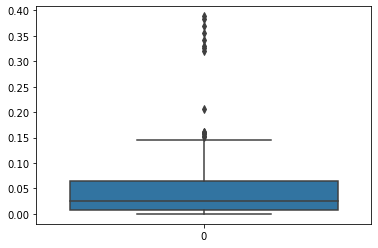

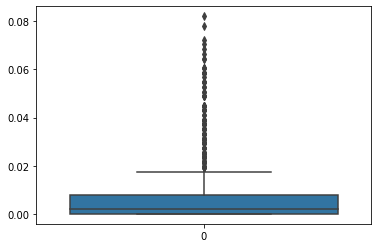

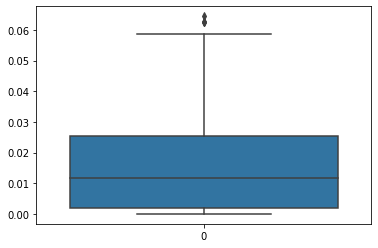

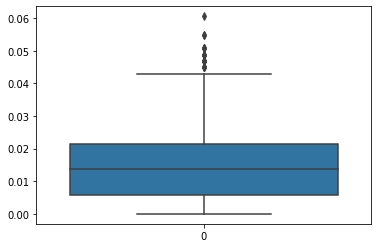

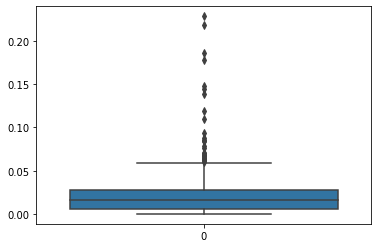

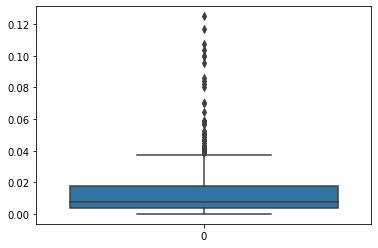

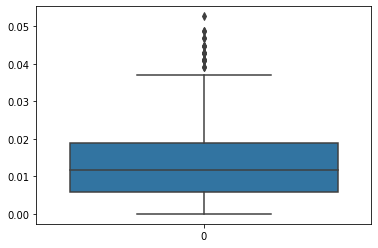

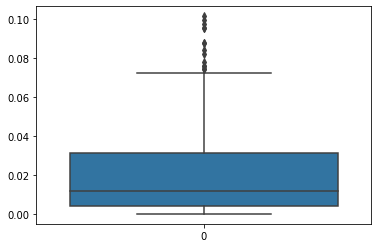

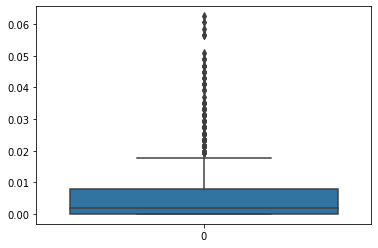

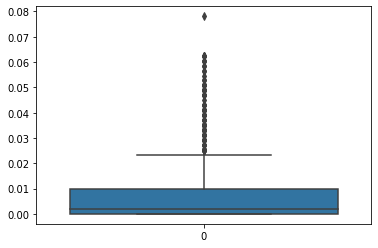

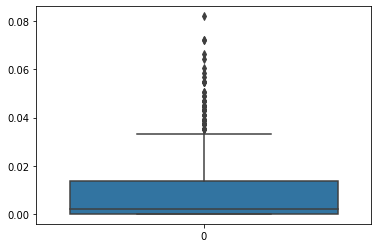

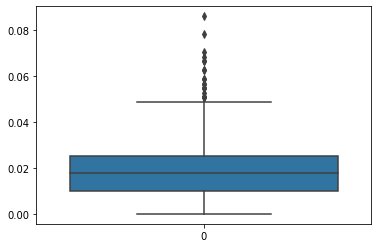

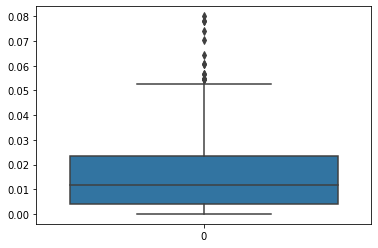

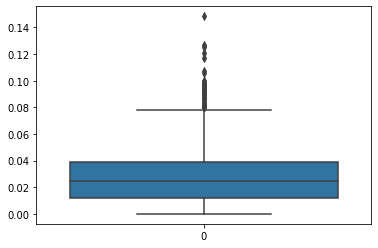

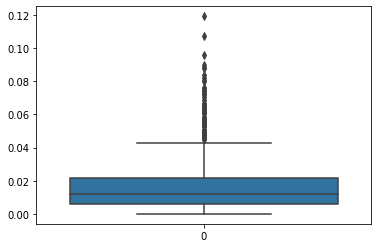

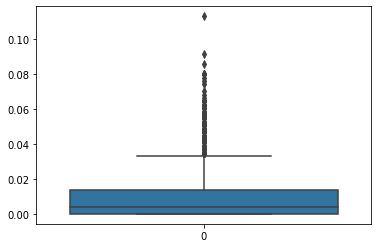

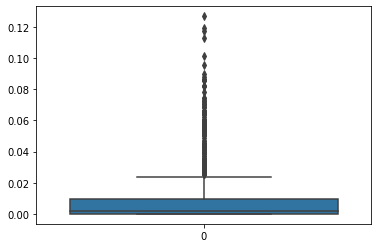

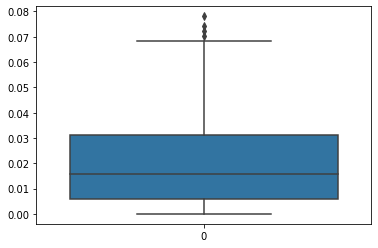

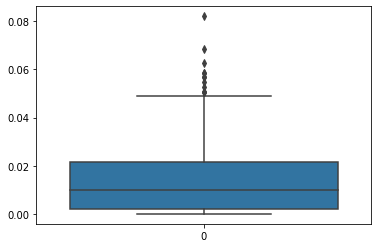

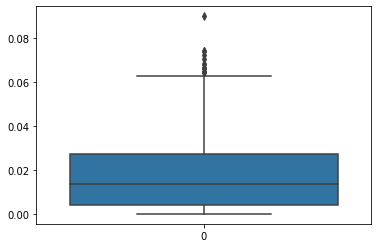

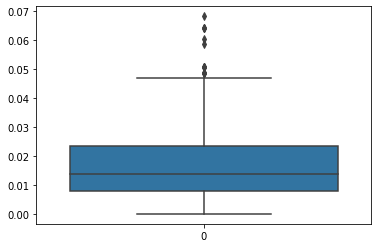

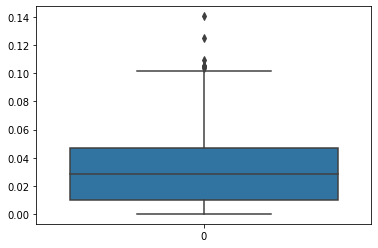

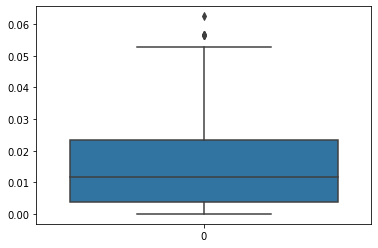

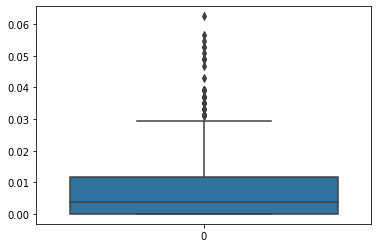

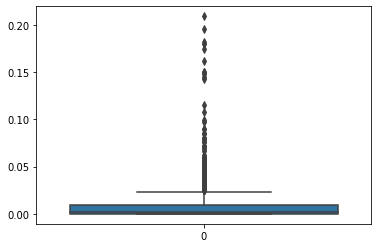

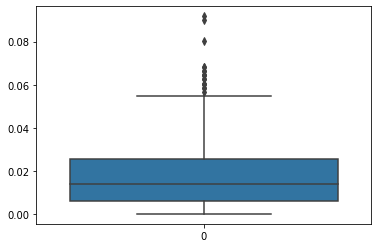

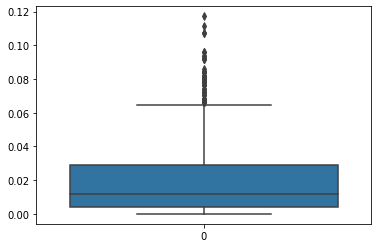

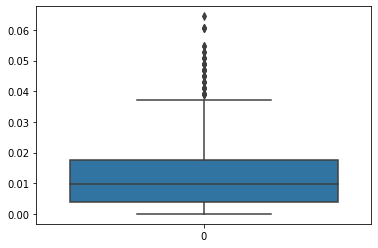

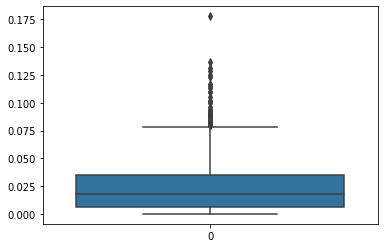

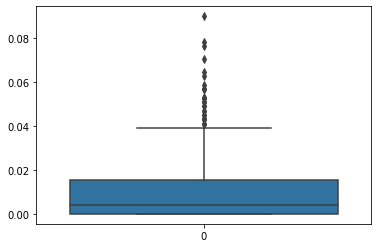

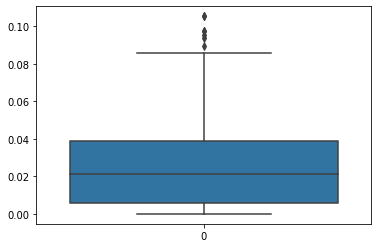

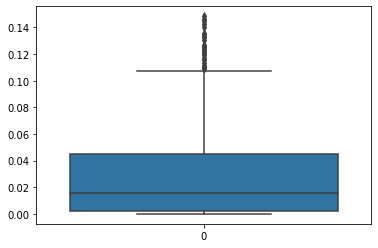

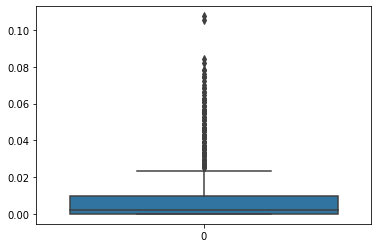

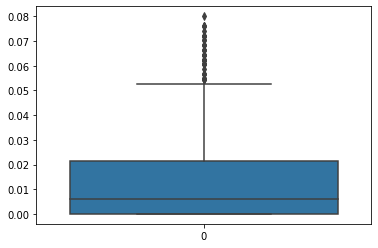

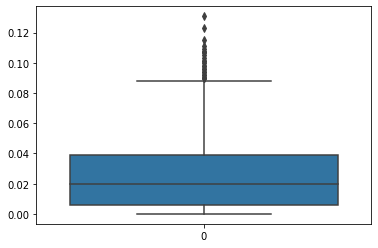

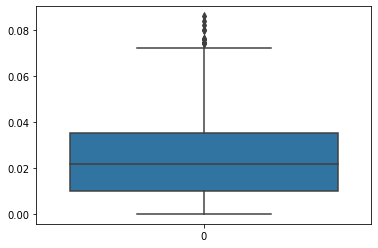

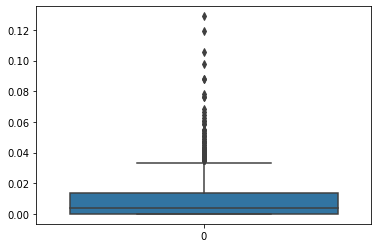

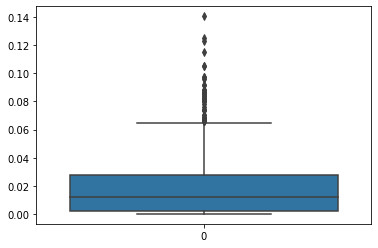

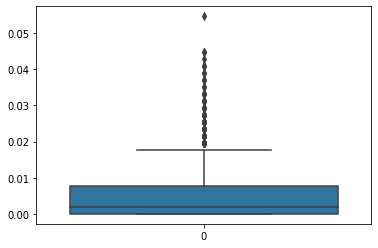

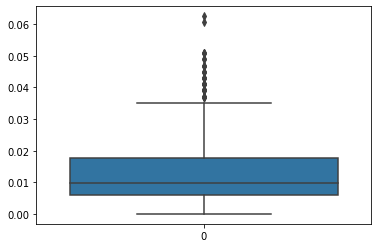

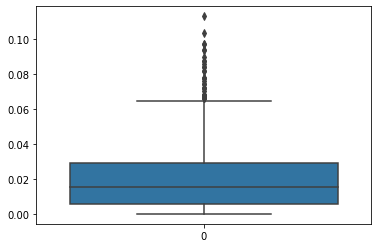

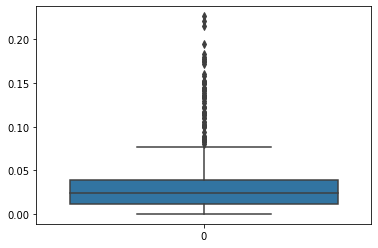

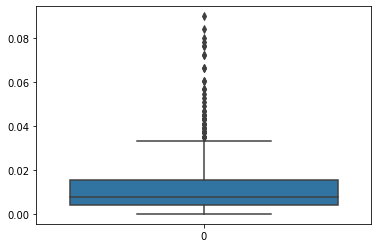

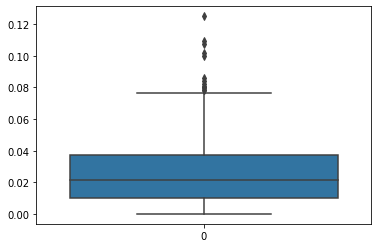

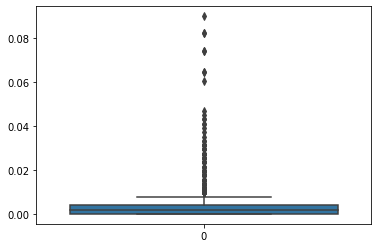

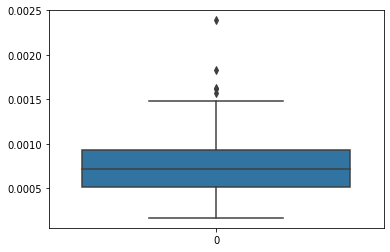

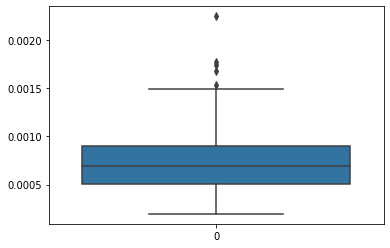

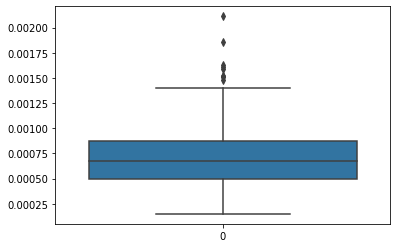

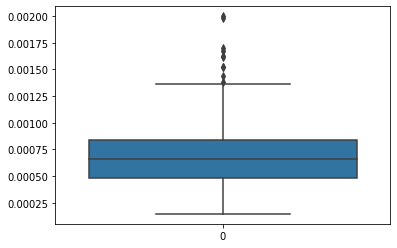

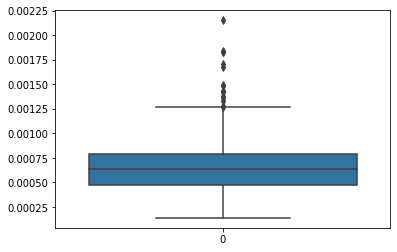

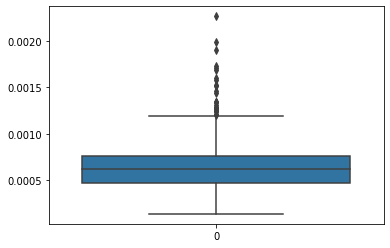

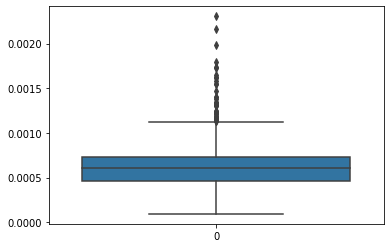

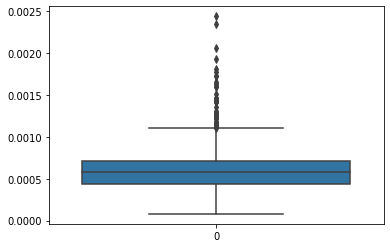

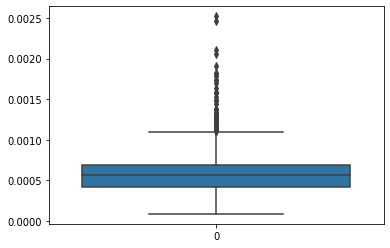

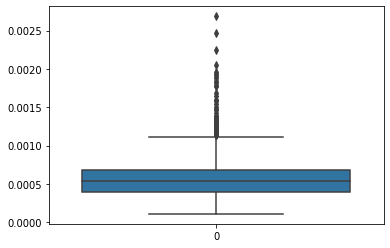

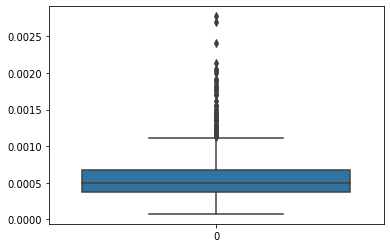

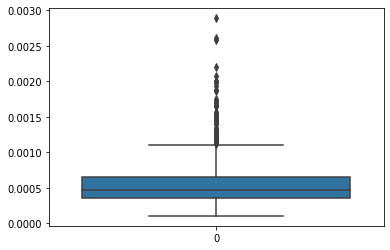

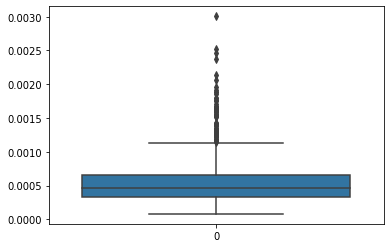

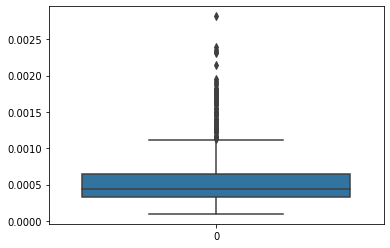

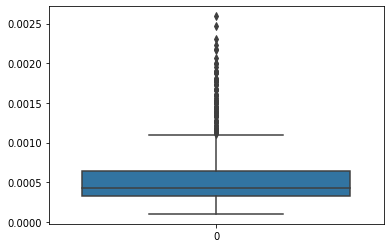

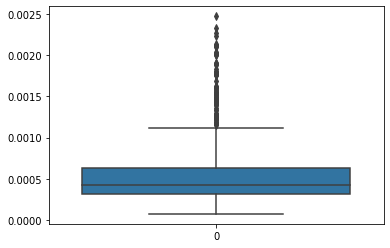

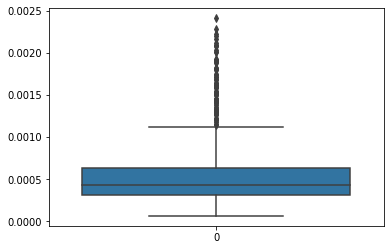

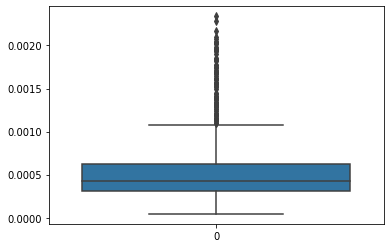

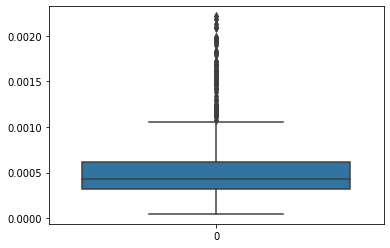

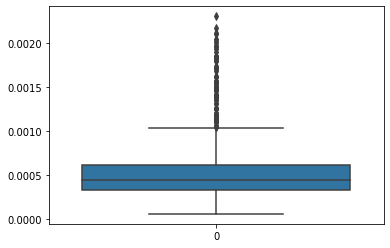

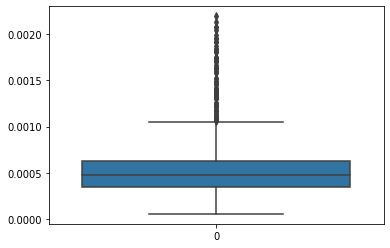

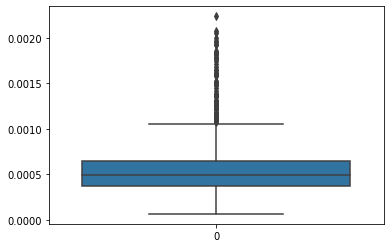

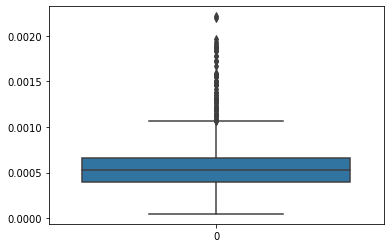

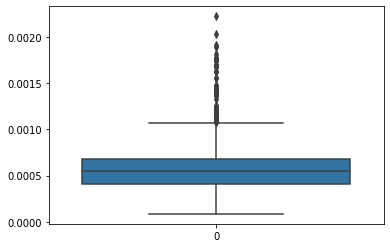

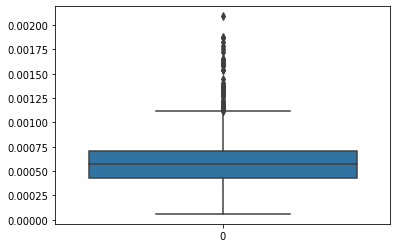

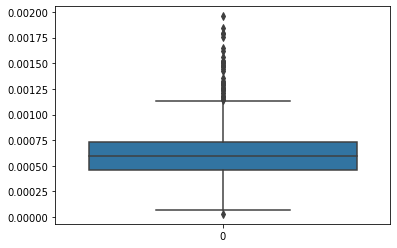

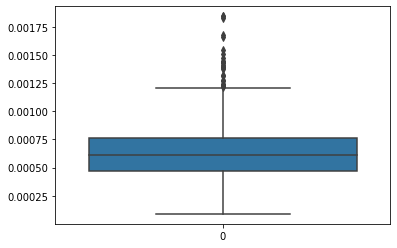

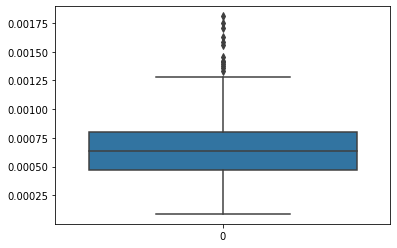

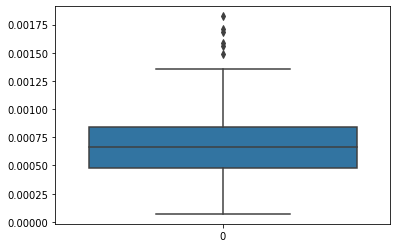

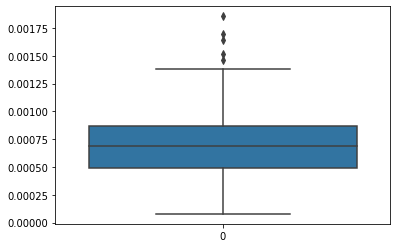

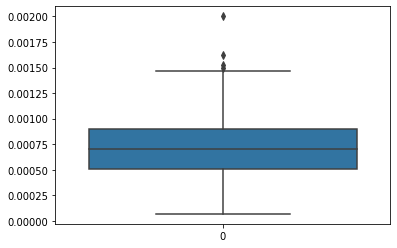

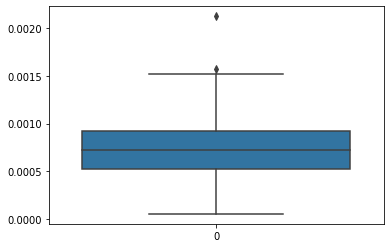

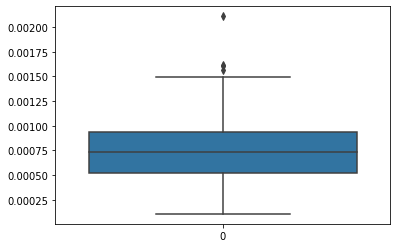

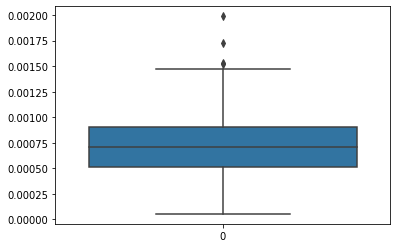

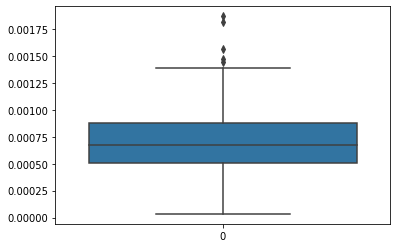

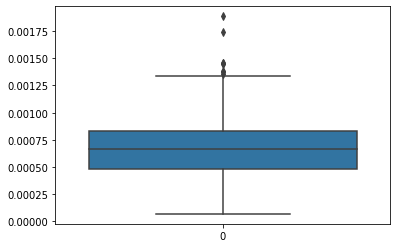

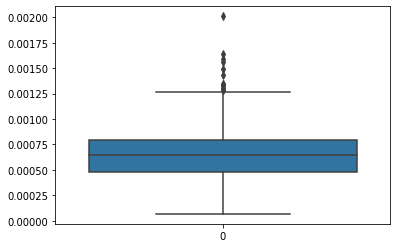

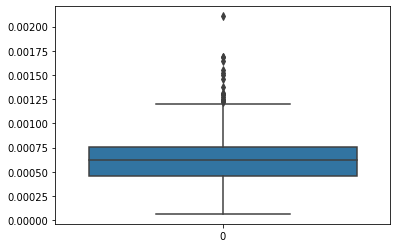

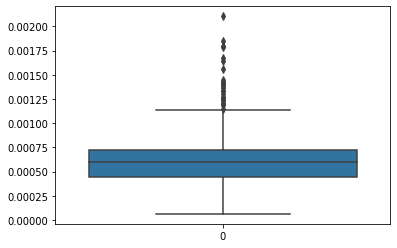

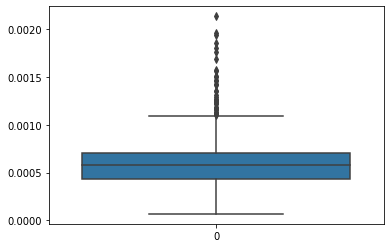

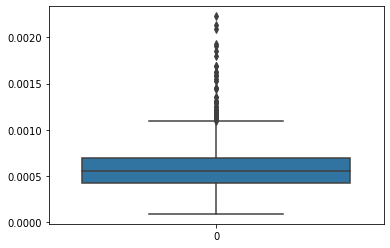

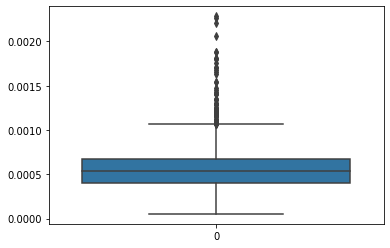

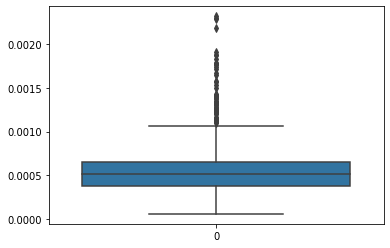

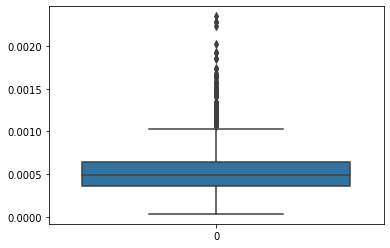

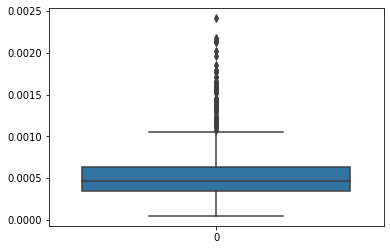

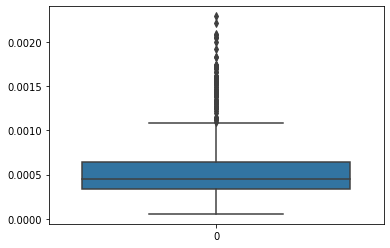

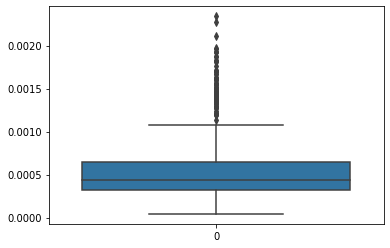

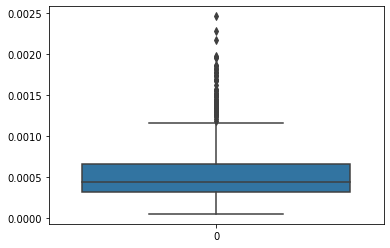

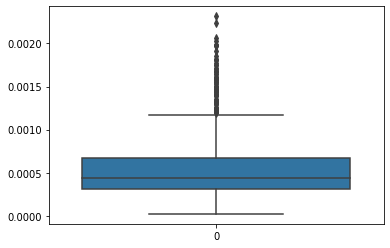

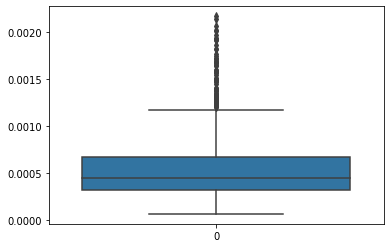

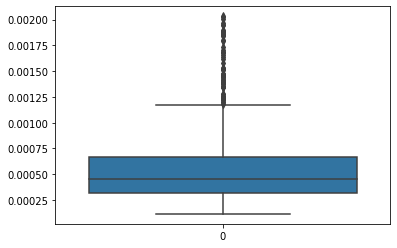

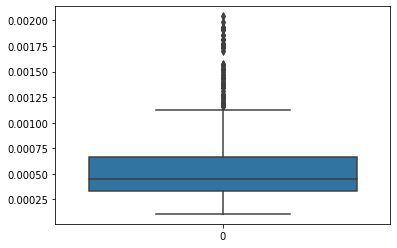

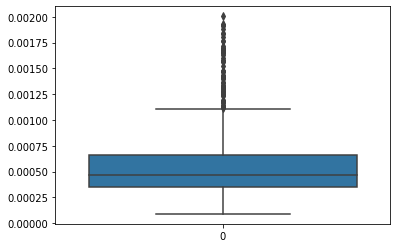

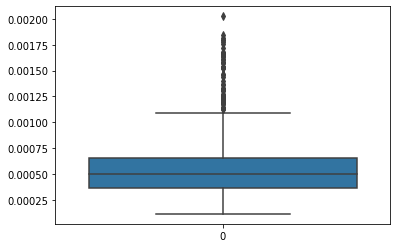

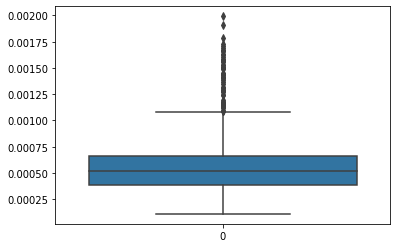

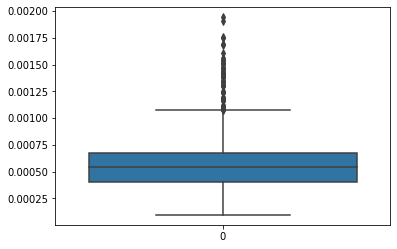

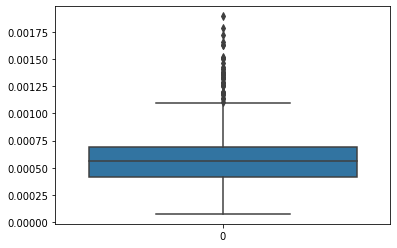

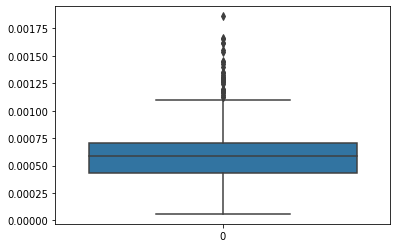

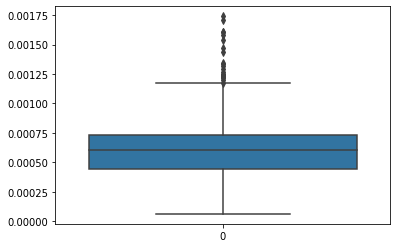

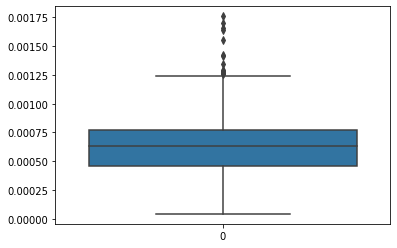

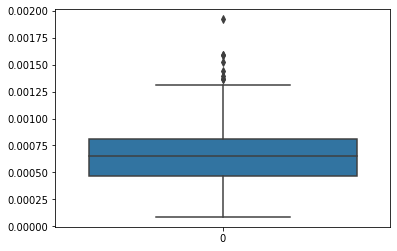

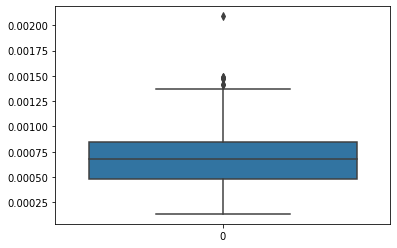

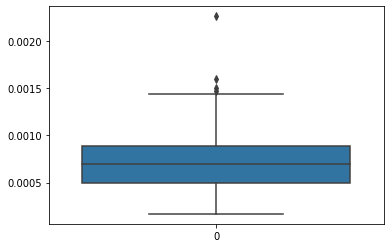

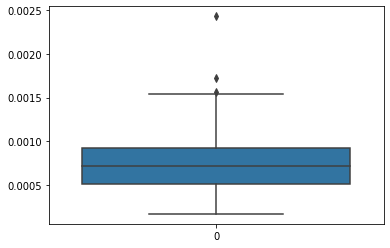

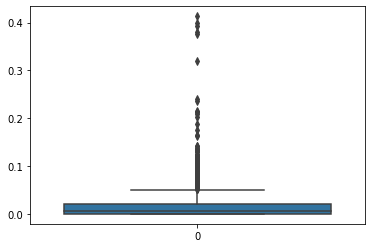

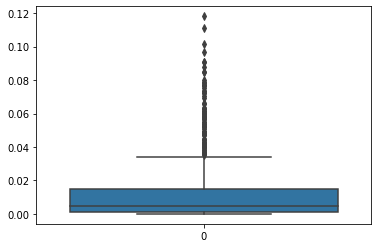

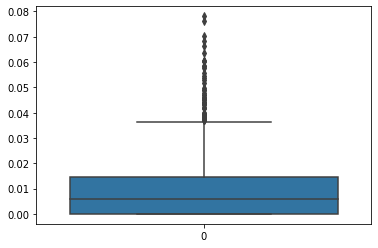

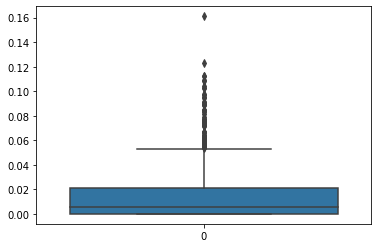

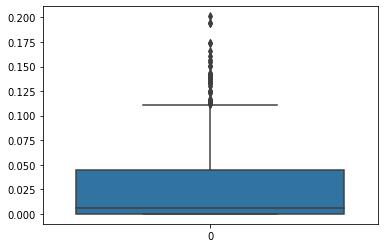

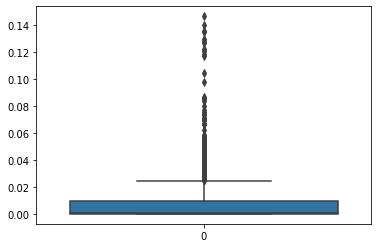

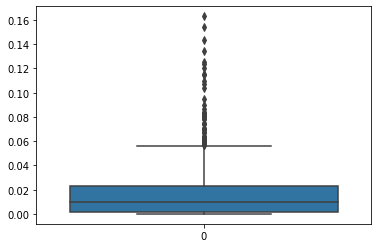

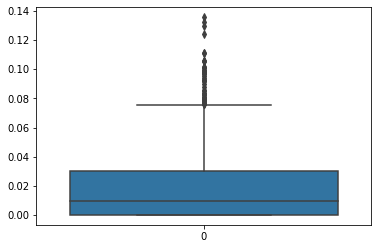

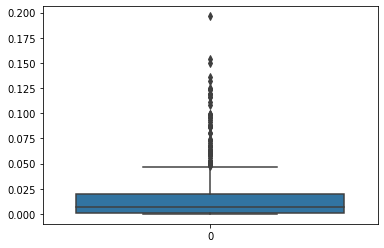

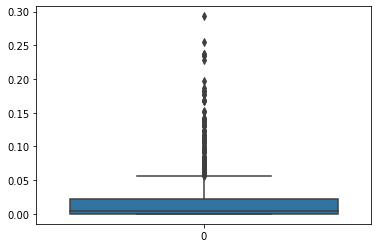

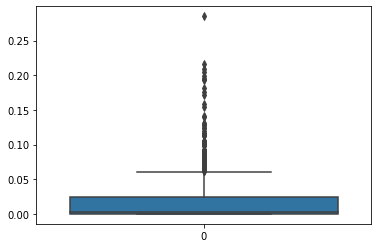

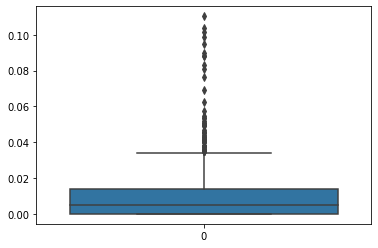

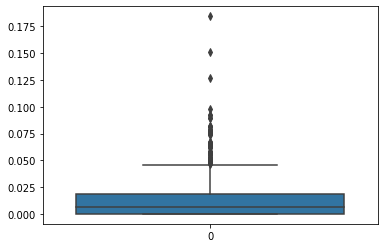

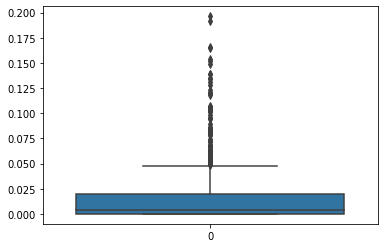

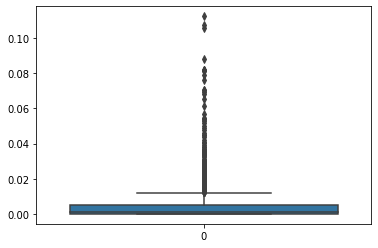

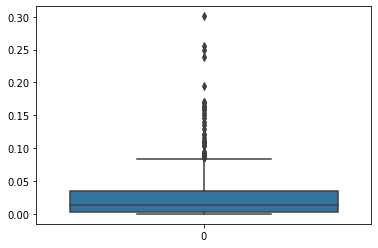

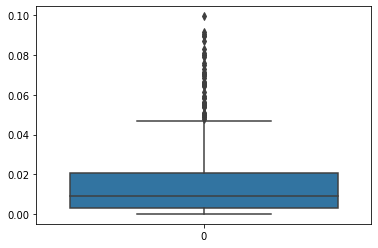

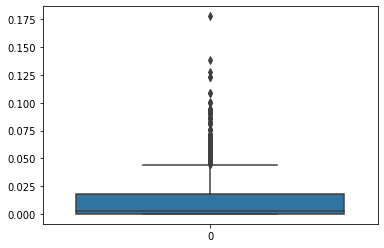

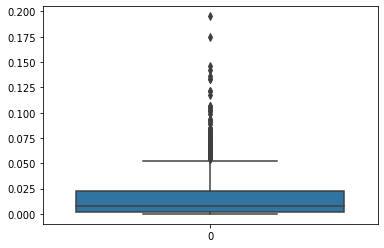

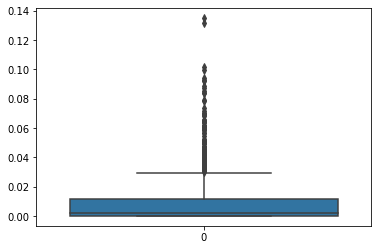

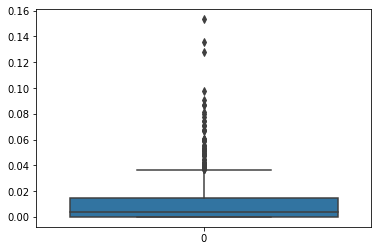

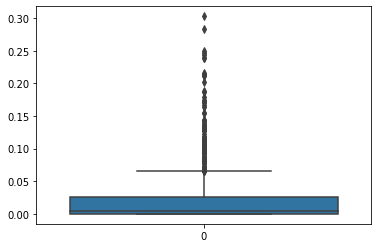

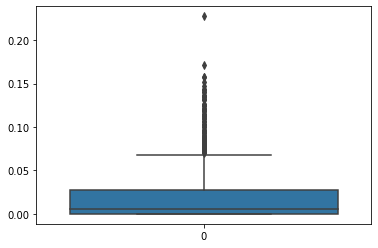

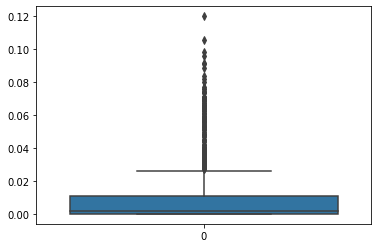

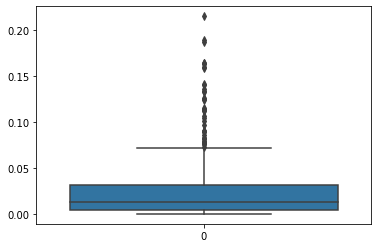

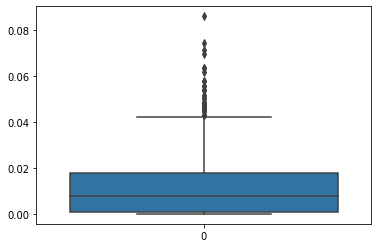

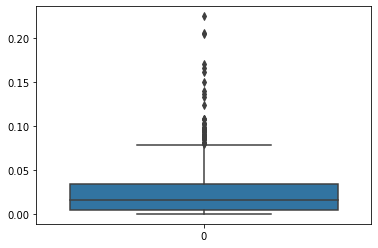

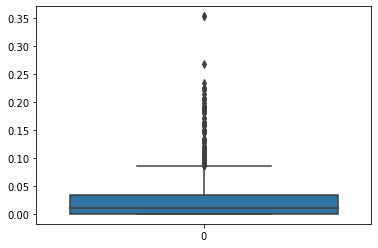

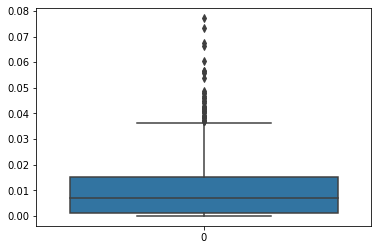

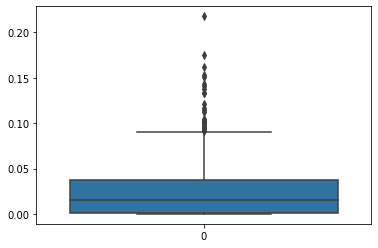

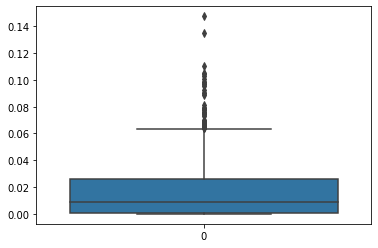

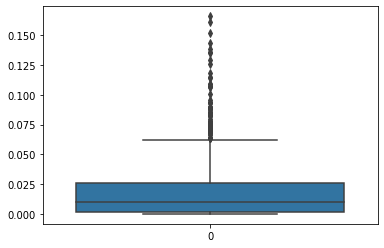

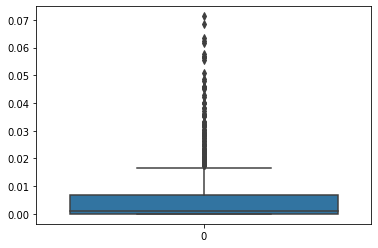

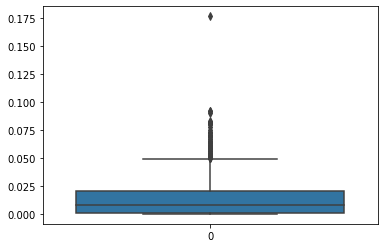

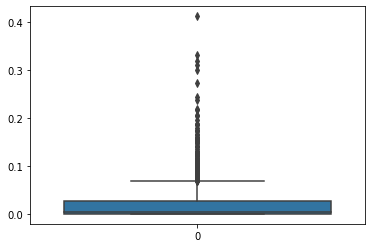

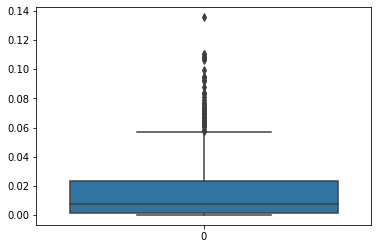

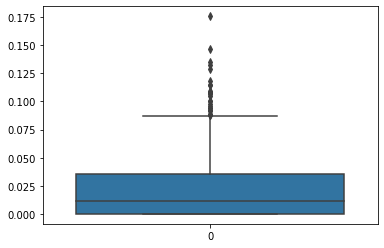

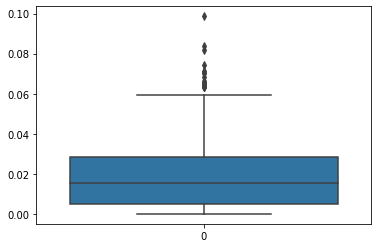

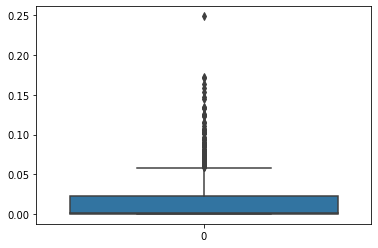

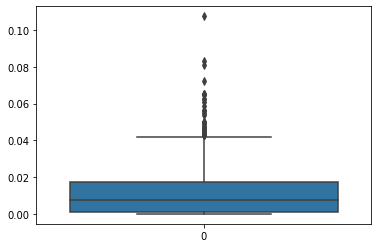

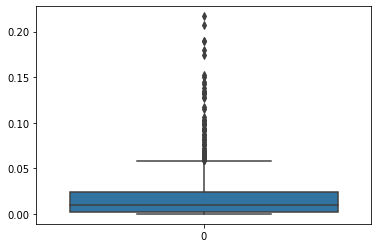

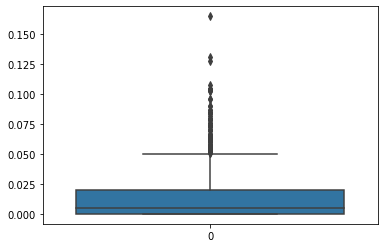

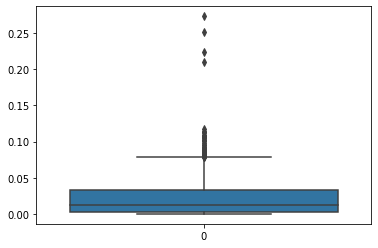

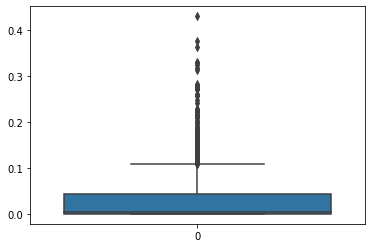

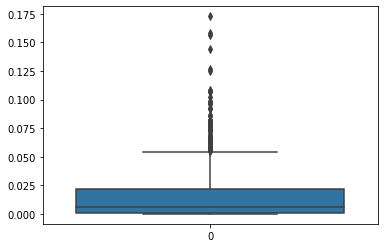

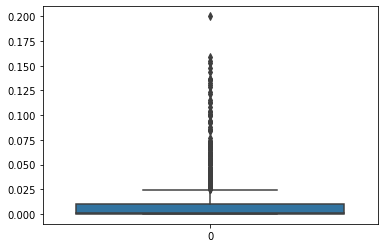

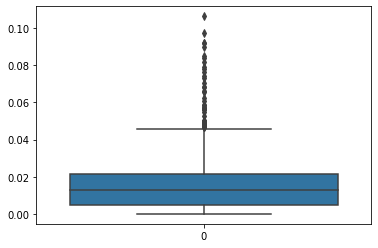

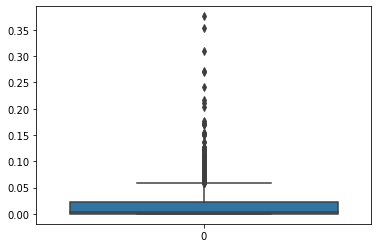

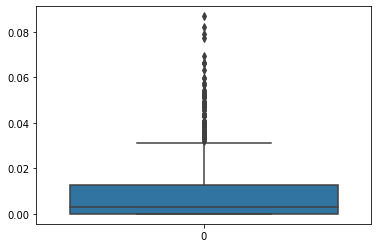

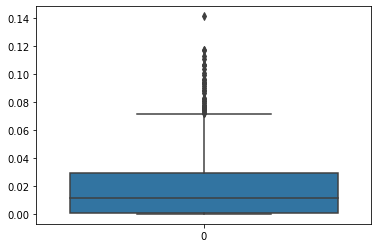

In [46]:
for column in train_data.select_dtypes(exclude='object'):
  sns.boxplot(data=train_data[column])
  plt.show()

In [47]:
test_data.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin17,margin18,margin19,margin20,margin21,margin22,margin24,margin25,margin26,margin28,margin29,margin30,margin31,margin32,margin33,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,...,texture11,texture13,texture14,texture17,texture19,texture20,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture33,texture34,texture35,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture49,texture50,texture53,texture54,texture55,texture57,texture58,texture59,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.007092,0.018798,0.024329,0.012281,0.041575,0.007276,0.015760,0.014915,0.020728,0.012978,0.013369,0.018837,0.006211,0.007237,0.009180,0.018301,0.015306,0.028675,0.015947,0.011189,0.010029,0.019515,0.014053,0.017719,0.015770,0.030757,0.015194,0.008368,0.010242,0.017923,0.018611,0.012435,0.024937,...,0.020641,0.009810,0.013261,0.013419,0.024659,0.014333,0.013461,0.016741,0.010773,0.010706,0.024222,0.022726,0.010126,0.020580,0.011438,0.023998,0.020756,0.026130,0.010593,0.022900,0.017692,0.019497,0.016330,0.006491,0.014732,0.026875,0.016713,0.022006,0.018865,0.011859,0.019454,0.014303,0.023133,0.035291,0.015033,0.011762,0.015881,0.019975,0.009389,0.020970
std,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.009515,0.016229,0.025912,0.012206,0.046846,0.011913,0.014536,0.010909,0.024973,0.013683,0.010404,0.018697,0.010414,0.011863,0.012634,0.011687,0.013870,0.023262,0.015951,0.016753,0.019178,0.015968,0.014258,0.015669,0.011060,0.022979,0.013585,0.011341,0.022155,0.015082,0.021230,0.011446,0.024762,...,0.035928,0.014593,0.017769,0.025867,0.030103,0.017301,0.022913,0.023232,0.018881,0.015606,0.042419,0.033110,0.019861,0.024978,0.012094,0.028509,0.053624,0.042201,0.012020,0.025926,0.021096,0.026146,0.039864,0.011890,0.018287,0.043090,0.022562,0.026686,0.016392,0.014024,0.029977,0.020460,0.029365,0.064482,0.022318,0.024771,0.014898,0.034704,0.013457,0.023407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.001953,0.005859,0.003906,0.001953,0.009766,0.000000,0.001953,0.005859,0.005859,0.003906,0.005859,0.

***Handeling Zeros***

In [48]:
def Impute_Zero_column(df):
  df1 = df.select_dtypes(exclude='object')
  for column in df1.columns:
    df[column].replace(0,df[column].median(), inplace=True)

Impute_Zero_column(train_data)
Impute_Zero_column(test_data)

In [49]:
def outlier_Analysis(df):
  for column in df.select_dtypes(exclude='object'):
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75-percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[column].where(df[column] >= upper_limit, iqr, inplace=True)
    df[column].where(df[column] <= lower_limit, iqr, inplace=True)

outlier_Analysis(train_data)
outlier_Analysis(test_data)

In [50]:
train_data.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin17,margin18,margin19,margin20,margin21,margin22,margin24,margin25,margin26,margin28,margin29,margin30,margin31,margin32,margin33,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,...,texture11,texture13,texture14,texture17,texture18,texture19,texture20,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture34,texture35,texture38,texture39,texture40,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture53,texture54,texture55,texture57,texture58,texture59,texture62,texture63,texture64
count,9.900000e+02,9.900000e+02,990.00000,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,990.00000,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,990.000000,9.900000e+02,9.900000e+02,990.000000,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,...,9.900000e+02,9.900000e+02,9.900000e+02,990.000000,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02
mean,1.757900e-02,3.271550e-02,0.03125,2.148500e-02,1.171900e-02,4.052775e-02,1.953100e-02,1.953000e-03,1.757800e-02,0.03125,1.367200e-02,5.029275e-02,5.859000e-03,1.757900e-02,1.367200e-02,1.757800e-02,1.171900e-02,1.123075e-02,2.343800e-02,5.859000e-03,7.813000e-03,1.171900e-02,0.015625,1.562600e-02,2.539000e-02,0.015625,9.766000e-03,7.813000e-03,2.343800e-02,1.367200e-02,1.953200e-02,1.562600e-02,3.320300e-02,1.709075e-02,7.813000e-03,7.813000e-03,1.757900e-02,2.099675e-02,1.171900e-02,2.734400e-02,...,2.148400e-02,8.789000e-03,1.171900e-02,0.015625,3.906000e-03,2.709975e-02,1.367200e-02,1.464800e-02,1.757800e-02,9.766000e-03,1.074200e-02,2.148400e-02,2.148500e-02,8.789000e-03,2.221675e-02,1.074200e-02,2.539100e-02,2.343800e-02,8.544750e-03,2.221675e-02,1.831075e-02,1.953100e-02,5.859000e-03,1.367200e-02,2.246100e-02,1.757900e-02,2.343700e-02,1.757800e-02,2.221675e-02,1.074200e-02,1.660200e-02,1.538075e-02,2.539100e-02,3.881800e-02,1.708975e-02,8.789000e-03,1.367200e-02,1.953200e-02,9.765000e-03,1.953100e-02
std,1.909160e-16,7.497793e-16,0.00000,2.672824e-16,1.371124e-16,2.290992e-16,3.297641e-16,3.905101e-17,2.325704e-16,0.00000,2.100076e-16,8.261457e-16,4.339001e-17,1.909160e-16,2.100076e-16,2.325704e-16,1.371124e-16,1.093428e-16,2.742248e-16,4.339001e-17,1.562040e-16,1.371124e-16,0.000000,3.124080e-16,4.651409e-16,0.000000,1.024004e-16,1.562040e-16,2.742248e-16,2.100076e-16,2.048008e-16,3.124080e-16,2.707536e-16,9.719361e-17,1.562040e-16,1.562040e-16,1.909160e-16,3.054656e-16,1.371124e-16,4.200153e-16,...,5.901041e-17,1.162852e-16,1.388480e-16,0.000000,7.810201e-17,4.234865e-16,2.117432e-16,2.117432e-16,2.290992e-16,1.024004e-16,2.950520e-17,6.248161e-17,2.638112e-16,1.162852e-16,3.818321e-16,2.950520e-17,1.006648e-16,2.742248e-16,2.238924e-16,3.783609e-16,6.942401e-18,3.332353e-16,4.425781e-17,2.117432e-16,1.423192e-16,1.909160e-16,2.742248e-16,2.360416e-16,3.818321e-16,2.950520e-17,2.221568e-16,1.822380e-16,9.372241e-17,6.803553e-16,1.562040e-16,1.162852e-16,2.100076e-16,2.048008e-16,1.509972e-16,3.297641e-16
min,1.757900e-02,3.271550e-02,0.03125,2.148500e-02,1.171900e-02,4.052775e-02,1.953100e-02,1.953000e-03,1.757800e-02,0.03125,1.367200e-02,5.029275e-02,5.

In [51]:
test_data.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin17,margin18,margin19,margin20,margin21,margin22,margin24,margin25,margin26,margin28,margin29,margin30,margin31,margin32,margin33,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,...,texture11,texture13,texture14,texture17,texture19,texture20,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture33,texture34,texture35,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture49,texture50,texture53,texture54,texture55,texture57,texture58,texture59,texture62,texture63,texture64
count,5.940000e+02,594.00000,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,594.00000,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,594.000000,5.940000e+02,594.00000,594.000000,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,...,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,594.000000,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02,5.940000e+02
mean,2.099675e-02,0.03125,2.929700e-02,1.953200e-02,1.367200e-02,4.296900e-02,1.757800e-02,1.953000e-03,1.757800e-02,0.03125,1.513675e-02,5.078100e-02,5.859000e-03,1.953200e-02,1.367200e-02,2.148500e-02,1.171900e-02,1.123075e-02,2.148400e-02,5.859000e-03,7.813000e-03,9.766000e-03,0.015625,1.757900e-02,0.03125,0.015625,9.766000e-03,7.813000e-03,2.148500e-02,1.367200e-02,1.953200e-02,1.367200e-02,3.515600e-02,1.562600e-02,7.813000e-03,7.813000e-03,1.757900e-02,1.757900e-02,1.171900e-02,2.734400e-02,...,2.246100e-02,1.074200e-02,1.318400e-02,1.245075e-02,2.905200e-02,1.269500e-02,1.464800e-02,1.757800e-02,1.074200e-02,1.025350e-02,2.539000e-02,2.832000e-02,7.813000e-03,2.026400e-02,9.766000e-03,2.539100e-02,1.074200e-02,2.343700e-02,8.544750e-03,2.050800e-02,1.928700e-02,1.855500e-02,9.765000e-03,5.859000e-03,1.367200e-02,3.149425e-02,1.660100e-02,2.539100e-02,1.855500e-02,1.074200e-02,1.464900e-02,0.015625,2.636800e-02,3.418000e-02,1.464800e-02,8.545000e-03,1.464900e-02,1.904300e-02,1.171800e-02,2.148500e-02
std,9.028165e-17,0.00000,2.326489e-16,8.680928e-17,1.388948e-16,3.958503e-16,1.736186e-16,2.387255e-18,1.770909e-16,0.00000,6.597505e-17,4.444635e-16,3.385562e-17,8.680928e-17,1.388948e-16,1.597291e-16,6.250268e-17,1.163244e-16,2.777897e-16,3.385562e-17,1.215330e-17,4.340464e-17,0.000000,2.639002e-16,0.00000,0.000000,4.340464e-17,1.215330e-17,1.597291e-16,1.388948e-16,8.680928e-17,1.388948e-16,3.541818e-16,2.430660e-17,1.215330e-17,1.215330e-17,2.639002e-16,2.639002e-16,6.250268e-17,2.777897e-16,...,1.319501e-16,1.388948e-16,9.549020e-17,1.197968e-16,7.291979e-17,8.333691e-17,9.375402e-17,1.736186e-16,1.388948e-16,8.160072e-17,1.701462e-16,3.715437e-16,1.215330e-17,2.430660e-16,4.514082e-17,3.645990e-16,1.388948e-16,1.215330e-16,8.333691e-17,3.125134e-17,1.597291e-16,1.562567e-16,1.215330e-16,3.472371e-17,1.406310e-16,4.861319e-17,1.840357e-16,3.645990e-16,1.562567e-16,1.388948e-16,1.614653e-16,0.000000,1.909804e-16,4.444635e-16,9.375402e-17,1.111159e-16,1.597291e-16,6.944742e-17,6.944742e-17,1.666738e-16
min,2.099675e-02,0.03125,2.929700e-02,1.953200e-02,1.367200e-02,4.296900e-02,1.757800e-02,1.953000e-03,1.757800e-02,0.03125,1.513675e-02,5.078100e-02,5.859000e-03,1.

#### **Encoding**

In [52]:
df = pd.get_dummies(train_data) 
df.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin17,margin18,margin19,margin20,margin21,margin22,margin24,margin25,margin26,margin28,margin29,margin30,margin31,margin32,margin33,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,...,species_Quercus_Coccinea,species_Quercus_Crassifolia,species_Quercus_Crassipes,species_Quercus_Dolicholepis,species_Quercus_Ellipsoidalis,species_Quercus_Greggii,species_Quercus_Hartwissiana,species_Quercus_Ilex,species_Quercus_Imbricaria,species_Quercus_Infectoria_sub,species_Quercus_Kewensis,species_Quercus_Nigra,species_Quercus_Palustris,species_Quercus_Phellos,species_Quercus_Phillyraeoides,species_Quercus_Pontica,species_Quercus_Pubescens,species_Quercus_Pyrenaica,species_Quercus_Rhysophylla,species_Quercus_Rubra,species_Quercus_Semecarpifolia,species_Quercus_Shumardii,species_Quercus_Suber,species_Quercus_Texana,species_Quercus_Trojana,species_Quercus_Variabilis,species_Quercus_Vulcanica,species_Quercus_x_Hispanica,species_Quercus_x_Turneri,species_Rhododendron_x_Russellianum,species_Salix_Fragilis,species_Salix_Intergra,species_Sorbus_Aria,species_Tilia_Oliveri,species_Tilia_Platyphyllos,species_Tilia_Tomentosa,species_Ulmus_Bergmanniana,species_Viburnum_Tinus,species_Viburnum_x_Rhytidophylloides,species_Zelkova_Serrata
0,0.017579,0.032716,0.03125,0.021485,0.011719,0.040528,0.019531,0.001953,0.017578,0.03125,0.013672,0.050293,0.005859,0.017579,0.013672,0.017578,0.011719,0.011231,0.023438,0.005859,0.007813,0.011719,0.015625,0.015626,0.02539,0.015625,0.009766,0.007813,0.023438,0.013672,0.019532,0.015626,0.033203,0.017091,0.007813,0.007813,0.017579,0.020997,0.011719,0.027344,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.017579,0.032716,0.03125,0.021485,0.011719,0.040528,0.019531,0.001953,0.017578,0.03125,0.013672,0.050293,0.005859,0.017579,0.013672,0.017578,0.011719,0.011231,0.023438,0.005859,0.007813,0.011719,0.015625,0.015626,0.02539,0.015625,0.009766,0.007813,0.023438,0.013672,0.019532,0.015626,0.033203,0.017091,0.007813,0.007813,0.017579,0.020997,0.011719,0.027344,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.017579,0.032716,0.03125,0.021485,0.011719,0.040528,0.019531,0.001953,0.017578,0.03125,0.013672,0.050293,0.005859,0.017579,0.013672,0.017578,0.011719,0.011231,0.023438,0.005859,0.007813,0.011719,0.015625,0.015626,0.02539,0.015625,0.009766,0.007813,0.023438,0.013672,0.019532,0.015626,0.033203,0.017091,0.007813,0.007813,0.017579,0.020997,0.011719,0.027344,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.017579,0.032716,0.03125,0.021485,0.011719,0.040528,0.019531,0.001953,0.017578,0.03125,0.013672,0.050293,0.005859,0.017579,0.013672,0.017578,0.011719,0.011231,0.023438,0.005859,0.007813,0.011719,0.015625,0.015626,0.02539,0.015625,0.009766,0.007813,0.023438,0.013672,0.019532,0.015626,0.033203,0.017091,0.007813,0.007813,0.017579,0.020997,0.011719,0.027344,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.017579,0.032716,0.03125,0.021485,0.011719,0.040528,0.019531,0.001953,0.017578,0.03125,0.013672,0.050293,0.005859,0.017579,0.013672,0.017578,0.011719,0.011231,0.023438,0.005859,0.007813,0.011719,0.015625,0.015626,0.02539,0.015625,0.009766,0.007813,0.023438,0.013672,0.019532,0.015626,0.033203,0.017091,0.007813,0.007813,0.017579,0.020997,0.011719,0.027344,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
X = train_data.drop(labels=['species'],axis=1)
Y = df['species_Quercus_Coccinea']

#### **Machine Classifier**

In [54]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [55]:
# train_test_split 80:20
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

**Random Forest Classifier**

In [56]:
# Initialize our classifier 
rf = RandomForestClassifier(n_estimators = 500)

# Train our classifier
rf.fit(X_train, y_train)

# Make predictions
rf_pred_test = rf.predict(X_test)

**Decision Tree Classifier**

In [57]:
# Initialize our classifier
dt = DecisionTreeClassifier()

# Train our classifier
dt.fit(X_train, y_train)

# Make predictions
dt_pred_test = dt.predict(X_test)


**Naive Bayes Classifier**

In [58]:
# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(X_train, y_train)

# Make predictions
gnb_pred_test = gnb.predict(X_test)


**SVC Classifier**

In [59]:
# Initialize our classifier
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Train our classifier
model = svc.fit(X_train, y_train)

# Make predictions
svc_pred_test = svc.predict(X_test)

#### **Accuracy**

In [67]:
from sklearn.metrics import accuracy_score
print('SVC Accuracy  %s ' % round(accuracy_score(svc_pred_test, y_test),5))
print('Naive Bayes Accuracy  %s' % round(1-accuracy_score(gnb_pred_test, y_test),5))
print('Random Forest Accuracy  %s' % round(accuracy_score(rf_pred_test, y_test),5))
print('Decision Tree Aaccuracy  %s' % round(accuracy_score(dt_pred_test, y_test),5))

SVC Accuracy  0.9899 
Naive Bayes Accuracy  0.9899
Random Forest Accuracy  0.9899
Decision Tree Aaccuracy  0.9899


**Metrices Report**

In [78]:
from sklearn.metrics import classification_report

print('SVC Report  %s ' % classification_report(y_test, svc_pred_test))

SVC Report                precision    recall  f1-score   support

           0       0.99      1.00      0.99       196
           1       0.00      0.00      0.00         2

    accuracy                           0.99       198
   macro avg       0.49      0.50      0.50       198
weighted avg       0.98      0.99      0.98       198
 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:

print('Naive Bayes Report  %s' % classification_report(y_test, gnb_pred_test))

Naive Bayes Report                precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.01      1.00      0.02         2

    accuracy                           0.01       198
   macro avg       0.01      0.50      0.01       198
weighted avg       0.00      0.01      0.00       198



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:

print('Random Forest Report  %s' % classification_report(y_test, rf_pred_test))

Random Forest Report                precision    recall  f1-score   support

           0       0.99      1.00      0.99       196
           1       0.00      0.00      0.00         2

    accuracy                           0.99       198
   macro avg       0.49      0.50      0.50       198
weighted avg       0.98      0.99      0.98       198



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:

print('Decision Tree Report  %s' % classification_report(y_test, dt_pred_test))

Decision Tree Report                precision    recall  f1-score   support

           0       0.99      1.00      0.99       196
           1       0.00      0.00      0.00         2

    accuracy                           0.99       198
   macro avg       0.49      0.50      0.50       198
weighted avg       0.98      0.99      0.98       198



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
